Name : SILVA G.B.N.M.
Index No : 190592X

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Q1) Average Filtering Vs Gaussian  Filtering

Answer : We can observe rectangular patches in box filtering while there is a smooth filtering in Gaussian filtering.

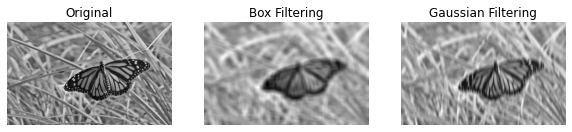

In [10]:
butterfly_img = cv.imread(r'butterfly.jpg',cv.IMREAD_REDUCED_GRAYSCALE_4)

assert butterfly_img is not None

box_kernel = 1./81*np.ones((9,9))
gaussian_kernel = cv.getGaussianKernel(9,4)

butterfly_box = cv.filter2D(butterfly_img,-1,box_kernel)
butterfly_gauss = cv.filter2D(butterfly_img,-1,gaussian_kernel,gaussian_kernel)

fig,ax = plt.subplots(1,3,figsize=(10,8))
ax[0].imshow(butterfly_img,cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(butterfly_box,cmap ='gray')
ax[1].set_title('Box Filtering')
ax[1].axis('off')

ax[2].imshow(butterfly_gauss,cmap ='gray')
ax[2].set_title('Gaussian Filtering')
ax[2].axis('off')

plt.show()

Q3) Graident of Contact Lens

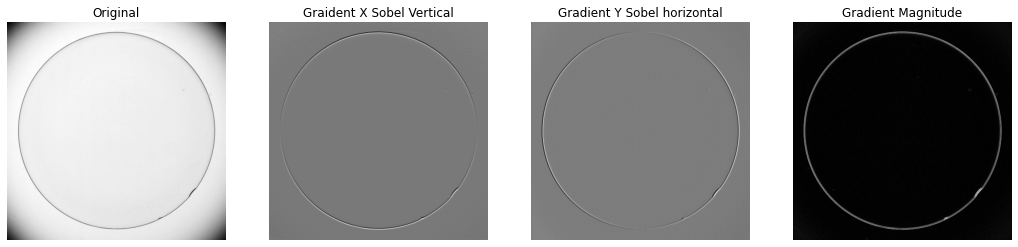

In [16]:
contc_lens = cv.imread(r'contact_lens.tif',cv.IMREAD_REDUCED_GRAYSCALE_2).astype(np.float32)
assert contc_lens is not None

sobel_ver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
sobel_hor = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)

imgx = cv.filter2D(contc_lens,-1,sobel_ver)
imgy = cv.filter2D(contc_lens,-1,sobel_hor)

grad_mag = np.sqrt(imgx**2 + imgy**2)

fig,ax = plt.subplots(1,4,figsize=(18,8))
ax[0].imshow(contc_lens,cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(imgx,cmap ='gray')
ax[1].set_title('Graident X Sobel Vertical')
ax[1].axis('off')

ax[2].imshow(imgy,cmap ='gray')
ax[2].set_title('Gradient Y Sobel horizontal')
ax[2].axis('off')

ax[3].imshow(grad_mag,cmap ='gray')
ax[3].set_title('Gradient Magnitude')
ax[3].axis('off')

plt.show()

Q4) Image Sharpening

(-0.5, 354.5, 236.5, -0.5)

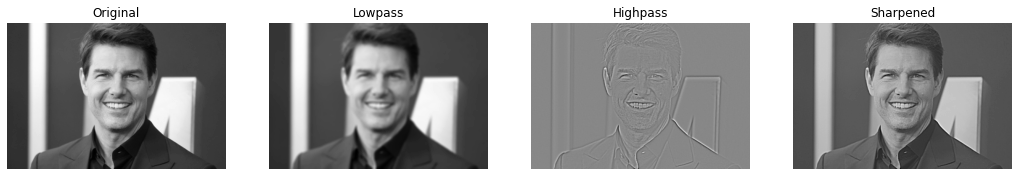

In [22]:
tom_img = cv.imread(r'tom.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert tom_img is not None

sigma =2
kernel = cv.getGaussianKernel(5,sigma)
lp = cv.sepFilter2D(tom_img,-1,kernel,kernel)
hp = tom_img.astype('float32')-lp.astype('float32')
sharpened = cv.addWeighted(tom_img.astype('float32'),1.0,hp,1.5,0)

fig,ax = plt.subplots(1,4,figsize=(18,8))
ax[0].imshow(tom_img,cmap ='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(lp,cmap ='gray')
ax[1].set_title('Lowpass')
ax[1].axis('off')

ax[2].imshow(hp,cmap ='gray')
ax[2].set_title('Highpass')
ax[2].axis('off')

ax[3].imshow(sharpened,cmap ='gray')
ax[3].set_title('Sharpened')
ax[3].axis('off')